# MRI Brain tumor detection

In [71]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import glob

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , accuracy_score
import random
import cv2  

## Reading images

## 1. tumor type 

In [72]:
pip install -r requirements.txt


  Using cached anyio-4.2.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached Babel-2.14.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl.metadata (2.2 kB)
  Using cached cffi-1.16.0-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached comm-0.2.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached debugpy-1.8.0-py2.py3-none-any.whl.metadata (1.1 kB)
  Using cached executing-2.0.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached fastjsonschema-2.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached filelock-3.9.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached fonttools-4.47.2-cp312-cp312-win_amd64.whl.metadata (160 kB)
  Using cached fsspec-2023.4.0-py3-none-any.whl.metadata (6.7 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached idna-3.6-py3-none-any.whl.metadata (9.9 k

ERROR: Could not find a version that satisfies the requirement torch==2.1.2+cu121 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.1.2+cu121


In [73]:
glioma_tumor = []
path = "E:/MRI/data/Training/glioma/*.jpg"

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)

    img = cv2.merge([r,g,b])
    
    glioma_tumor.append(img)

       # if we want to see images
    # cv2.imshow("sanke",img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()



In [74]:
len(glioma_tumor)

1321

## 2 . tumor type 

In [75]:
meningioma_tumor = []
path = "E:/MRI/data/Training/meningioma/*.jpg"

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b , g , r = cv2.split(img)

    img = cv2.merge([r,g,b])
    meningioma_tumor.append(img)
    


    

In [76]:
len(meningioma_tumor)

1339

## 3 tumor type

In [77]:
pituitary_tumor = []
path = "E:/MRI/data/Training/pituitary/*.jpg"

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b , g , r = cv2.split(img)

    img  = cv2.merge([r,g,b])
    pituitary_tumor.append(img)

In [78]:
len(pituitary_tumor)

1457

## 4 . healthy brain

In [79]:
healthy = []
path = "E:/MRI/data/Training/notumor/*.jpg"

for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b,g,r = cv2.split(img)

    img = cv2.merge([r,g,b])
    healthy.append(img)

In [80]:
len(healthy)


1595

In [81]:
healthy = np.array(healthy)
glioma_tumor = np.array(glioma_tumor)
meningioma_tumor = np.array(meningioma_tumor)
pituitary_tumor = np.array(pituitary_tumor)

All = np.concatenate((healthy,glioma_tumor,meningioma_tumor,pituitary_tumor))

In [82]:
healthy.shape

(1595, 128, 128, 3)

In [83]:
np.random.choice(100,4)

array([92, 44, 60, 14], dtype=int32)

# VIsualizing the mri images

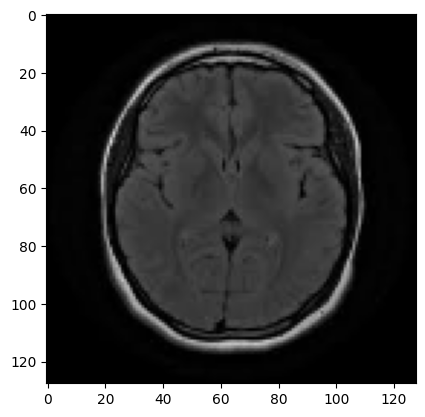

In [84]:
plt.imshow(healthy[26])

In [85]:
def plot_random(healthy , glioma_tumor ,pituitary_tumor,meningioma_tumor, num = 5):
    healthy_img = healthy[np.random.choice(healthy.shape[0], num , replace=False)]
    glioma_img = glioma_tumor[np.random.choice(glioma_tumor.shape[0],num,replace = False)]
    pituitary_img = pituitary_tumor[np.random.choice(pituitary_tumor.shape[0],num,replace = False)]
    meningioma_img = meningioma_tumor[np.random.choice(meningioma_tumor.shape[0],num,replace = False)]

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1,num,i+1)
        plt.title("healthy brain")
        plt.imshow(healthy_img[i])

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1,num,i+1)
        plt.title("glioma_tumour brain")
        plt.imshow(glioma_img[i])

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1,num,i+1)
        plt.title("pituitary tumor")
        plt.imshow(pituitary_img[i])

    plt.figure(figsize=(16,9))
    for i in range (num):
        plt.subplot(1,num,i+1)
        plt.title("meningioma tumor")
        plt.imshow(meningioma_img[i])

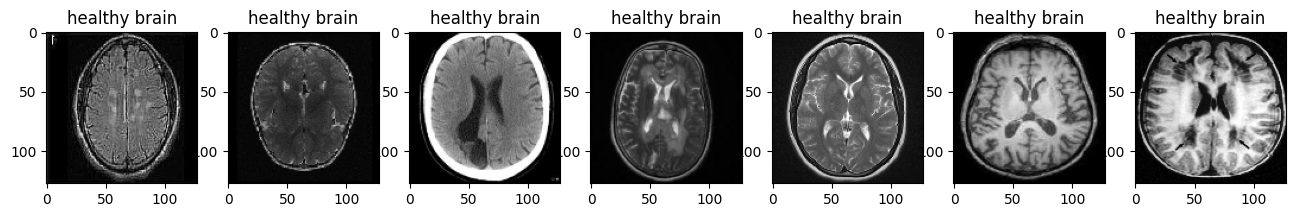

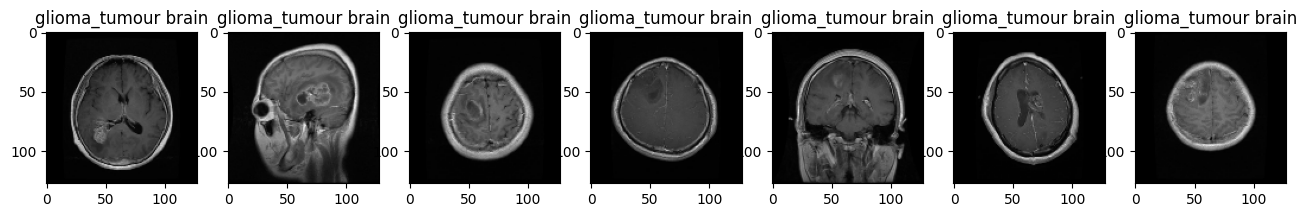

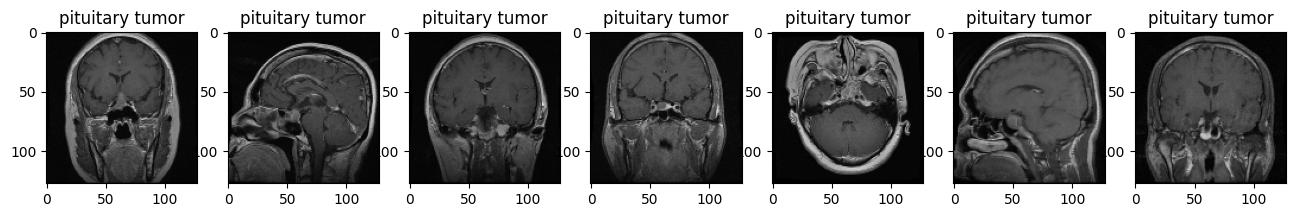

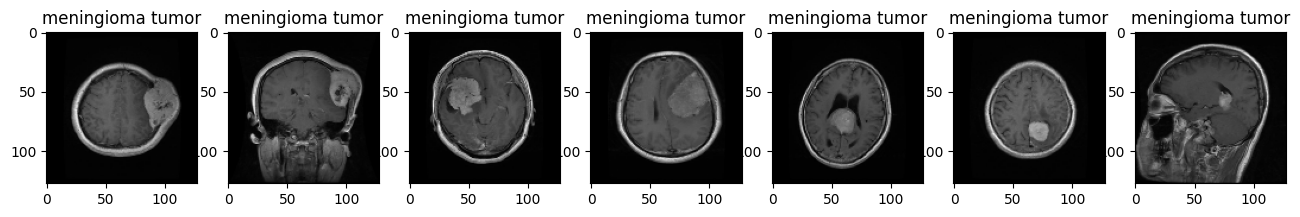

In [86]:
plot_random(healthy,glioma_tumor,pituitary_tumor,meningioma_tumor, num =7)

## create torch dataset class

In [87]:
class Dataset(object):
    def __getitem__(self, index):
        raise NotImplementedError  # Placeholder for future implementation

    def __len__(self):
        raise NotImplementedError  # Placeholder for future implementation

    def __add__(self,labels):
        return NoDataset([self,other])

## creating MRI costom dataset class

In [88]:
class MRI(Dataset):
    def __init__(self):
        glioma_tumor = []
        meningioma_tumor = []
        pituitary_tumor = []
        healthy = []

        # Load glioma tumor images
        for f in glob.iglob("E:/MRI/data/Training/glioma/*.jpg"):
            img = cv2.imread(f)
            if img is not None:  # Check if image is valid
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = img.transpose((2, 0, 1))  # Reshape to (C, H, W)
                glioma_tumor.append(img)

        # Load meningioma tumor images
        for f in glob.iglob("E:/MRI/data/Training/meningioma/*.jpg"):
            img = cv2.imread(f)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.transpose((2, 0, 1))
                meningioma_tumor.append(img)

        # Load pituitary tumor images
        for f in glob.iglob("E:/MRI/data/Training/pituitary/*.jpg"):
            img = cv2.imread(f)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.transpose((2, 0, 1))
                pituitary_tumor.append(img)

        # Load healthy images
        for f in glob.iglob("E:/MRI/data/Training/healthy/*.jpg"):
            img = cv2.imread(f)
            if img is not None:
                img = cv2.resize(img, (128, 128))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.transpose((2, 0, 1))
                healthy.append(img)

        # Debugging: Print the number of images loaded
        print(f"Glioma tumor: {len(glioma_tumor)} images")
        print(f"Meningioma tumor: {len(meningioma_tumor)} images")
        print(f"Pituitary tumor: {len(pituitary_tumor)} images")
        print(f"Healthy: {len(healthy)} images")

        # Convert lists to numpy arrays and handle empty lists
        glioma_tumor = np.array(glioma_tumor, dtype=np.float32) if glioma_tumor else np.empty((0, 3, 128, 128), dtype=np.float32)
        meningioma_tumor = np.array(meningioma_tumor, dtype=np.float32) if meningioma_tumor else np.empty((0, 3, 128, 128), dtype=np.float32)
        pituitary_tumor = np.array(pituitary_tumor, dtype=np.float32) if pituitary_tumor else np.empty((0, 3, 128, 128), dtype=np.float32)
        healthy = np.array(healthy, dtype=np.float32) if healthy else np.empty((0, 3, 128, 128), dtype=np.float32)

        # Normalize images to [0, 1]
        glioma_tumor /= 255.0
        meningioma_tumor /= 255.0
        pituitary_tumor /= 255.0
        healthy /= 255.0

        # Create labels
        glioma_tumor_label = np.ones(glioma_tumor.shape[0], dtype=np.float32)
        meningioma_tumor_label = np.ones(meningioma_tumor.shape[0], dtype=np.float32) * 2
        pituitary_tumor_label = np.ones(pituitary_tumor.shape[0], dtype=np.float32) * 3
        healthy_label = np.zeros(healthy.shape[0], dtype=np.float32)

        # Concatenate images and labels
        self.images = np.concatenate((glioma_tumor, meningioma_tumor, pituitary_tumor, healthy), axis=0)
        self.labels = np.concatenate((glioma_tumor_label, meningioma_tumor_label, pituitary_tumor_label, healthy_label), axis=0)

    def __len__(self):
        return self.images.shape[0]

    def __getitem__(self, index):
        sample = {'image': self.images[index], 'label': self.labels[index]}
        return sample


In [89]:
mri_dataset = MRI()


Glioma tumor: 1321 images
Meningioma tumor: 1339 images
Pituitary tumor: 1457 images
Healthy: 1400 images


In [90]:
mri_dataset[1]

{'image': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],
 
        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32),
 'label': np.float32(1.0)}

In [91]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [92]:
img.shape

(128, 128, 3)

In [93]:
a = np.max(img)  # due to normalization
b =np.min(img)

In [94]:
a , b


(np.uint8(228), np.uint8(0))

# Creating dataloader

In [95]:
index = list(range(len(mri_dataset)))
random.shuffle(index)

In [96]:
# index

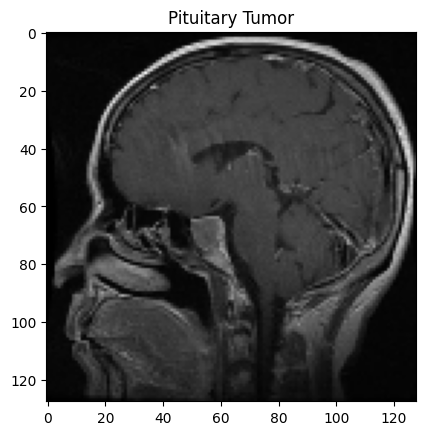

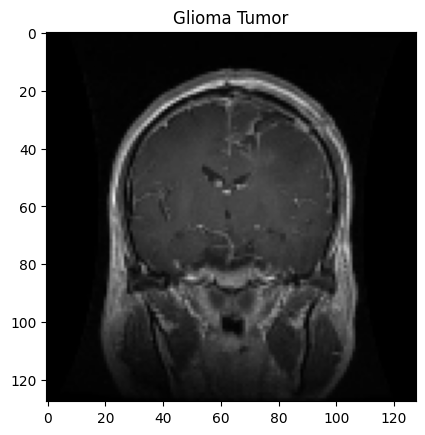

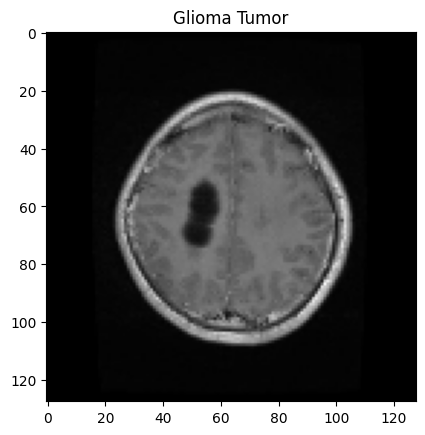

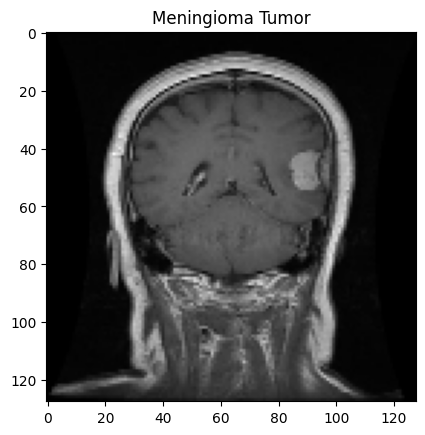

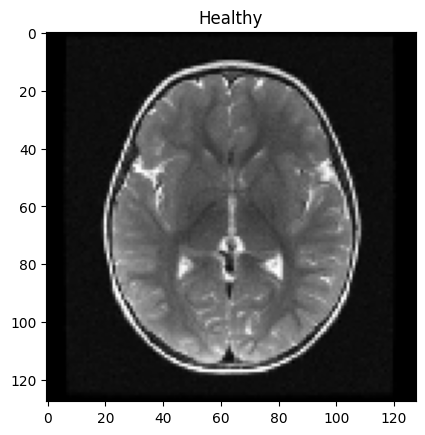

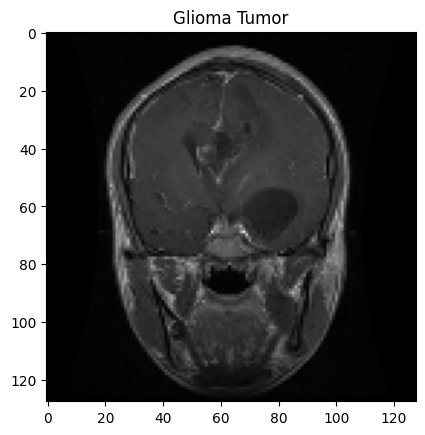

In [97]:
# One way of iterating

names = {0: 'Healthy', 1: 'Glioma Tumor', 2: 'Meningioma Tumor', 3: 'Pituitary Tumor'}
dataloader = DataLoader(mri_dataset, shuffle=True)

# Iterate over the dataset
for i, sample in enumerate(dataloader):
    img = sample['image'].squeeze()  # Remove unnecessary dimensions (if any)
    # Transpose from (C, H, W) to (H, W, C) for displaying in plt.imshow
    img = np.transpose(img, (1, 2, 0))  # (C, H, W) -> (H, W, C)
    plt.title(names[sample['label'].item()])
    plt.imshow(img)
    plt.show()
    if i == 5:
        break


# create a model

In [114]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # CNN feature extractor
        self.cnn_model = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Fully connected layers
        self.fc_model = nn.Sequential(
            nn.Linear(in_features=128 * 18 * 18, out_features=512),  # Adjusted for input size (150x150 images)
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(in_features=512, out_features=256),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(in_features=256, out_features=4)  # 4 output classes
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc_model(x)
        return x  # No softmax, since it's included in nn.CrossEntropyLoss()


In [115]:
print(torch.__version__)  
print(torch.version.cuda)  # CUDA version तपासा


2.6.0+cu118
11.8


In [116]:
# device will be 'cuda' if a GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# creating a CPU tensor
cpu_tensor = torch.rand(10).to(device)
# moving same tensor to GPU
gpu_tensor = cpu_tensor.to(device)

print(cpu_tensor, cpu_tensor.dtype, type(cpu_tensor), cpu_tensor.type())
print(gpu_tensor, gpu_tensor.dtype, type(gpu_tensor), gpu_tensor.type())

print(cpu_tensor*gpu_tensor)

tensor([0.3998, 0.0582, 0.9154, 0.7262, 0.7202, 0.5066, 0.5171, 0.8679, 0.2075,
        0.2166], device='cuda:0') torch.float32 <class 'torch.Tensor'> torch.cuda.FloatTensor
tensor([0.3998, 0.0582, 0.9154, 0.7262, 0.7202, 0.5066, 0.5171, 0.8679, 0.2075,
        0.2166], device='cuda:0') torch.float32 <class 'torch.Tensor'> torch.cuda.FloatTensor
tensor([0.1598, 0.0034, 0.8380, 0.5274, 0.5187, 0.2566, 0.2674, 0.7533, 0.0431,
        0.0469], device='cuda:0')


In [117]:
mri_dataset = MRI()

device = torch.device('cuda:0')
model = CNN().to(device)

Glioma tumor: 1321 images
Meningioma tumor: 1339 images
Pituitary tumor: 1457 images
Healthy: 1400 images


In [118]:
dataloader = DataLoader(mri_dataset, batch_size=32, shuffle=False)

In [121]:
model.eval()
outputs = []
y_true = []
with torch.no_grad():
    for D in dataloader:
        images = D['image'].to(device)
        labels = D['label'].to(device)

        y_hat = model(images)

        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x32768 and 41472x512)

In [ ]:

outputs = torch.softmax(torch.tensor(outputs), dim=1).numpy()
predicted_labels = np.argmax(outputs, axis=1)


In [ ]:
def threshold(scores,threshold=0.50, minimum=0, maximum = 1.0):
    x = np.array(list(scores))
    x[x >= threshold] = maximum
    x[x < threshold] = minimum
    return x

In [ ]:
# For multi-class, use np.argmax to get the predicted labels (class with highest probability)
predicted_labels = np.argmax(outputs, axis=1)  # Shape: (N, )

# Ensure y_true is in the same shape as predicted_labels
y_true = np.array(y_true)  # Convert y_true into a numpy array if it isn't already


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, np.argmax(outputs, axis=1))  # For multi-class
# cm = confusion_matrix(y_true, threshold(outputs))  # Uncomment for binary classification

# Define class labels (modify if needed)
class_names = ['Healthy', 'Glioma', 'Meningioma', 'Pituitary']  # Change for your dataset

plt.figure(figsize=(10, 7))  # Adjust size for better readability
ax = plt.subplot()

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', linewidths=1, linecolor='black', ax=ax, annot_kws={"size": 16})

# Set labels, title, and ticks
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Set tick labels dynamically
ax.xaxis.set_ticklabels(class_names, fontsize=12, rotation=30)
ax.yaxis.set_ticklabels(class_names, fontsize=12, rotation=30)

plt.show()
